In [1]:
from pathlib import Path
import os

if Path.cwd().name != 'src':
    os.chdir('/home/vaschetti/maxarSrc/src')

In [2]:
from my_functions.assemble import names
events_names = names.get_all_events()
for i, e_n in enumerate(events_names):
    print(i, e_n)

0 BayofBengal-Cyclone-Mocha-May-23
1 Emilia-Romagna-Italy-flooding-may23
2 Gambia-flooding-8-11-2022
3 Hurricane-Fiona-9-19-2022
4 Hurricane-Ian-9-26-2022
5 Hurricane-Idalia-Florida-Aug23
6 India-Floods-Oct-2023
7 Indonesia-Earthquake22
8 Kahramanmaras-turkey-earthquake-23
9 Kalehe-DRC-Flooding-5-8-23
10 Libya-Floods-Sept-2023
11 Marshall-Fire-21-Update
12 Maui-Hawaii-fires-Aug-23
13 Morocco-Earthquake-Sept-2023
14 NWT-Canada-Aug-23
15 New-Zealand-Flooding23
16 Sudan-flooding-8-22-2022
17 cyclone-emnati22
18 pakistan-flooding22
19 shovi-georgia-landslide-8Aug23
20 southafrica-flooding22
21 tonga-volcano21
22 yellowstone-flooding22


In [3]:
from my_functions.configs import SegmentConfig
config = SegmentConfig(batch_size = 1,
                       device='cuda:2',
                       size = 600,
                       stride = 400)

ModuleNotFoundError: No module named 'torch'

In [4]:
from my_functions.assemble import holders

event = holders.Event(events_names[6],
                      seg_config = config,
                      when='pre')

print(event.region_name)

all_mosaics_names = event.all_mosaics_names
print(all_mosaics_names)

m0 = event.mosaics[all_mosaics_names[0]]
print(f'Number of tiles: {m0.tiles_num}')

AfricaWest-Full
['10300100CFC9A500', '105001002BD68F00', '1040010073D77D00']
Number of tiles: 18


In [5]:
#m0.set_build_gdf()

In [6]:
from torchgeo.datasets import stack_samples
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from time import time
import warnings
import rasterio
import torch

from my_functions.samplers import samplers, samplers_utils
from my_functions.geo_datasets import geoDatasets
from my_functions.ESAM_segment import segment, segment_utils
from my_functions.detect import detect
from my_functions import output


# Ignore all warnings
warnings.filterwarnings('ignore')


Buildings: found 3 links matching: [33303200, 3330320, 333032]


  0%|          | 0/1 [00:02<?, ?it/s]


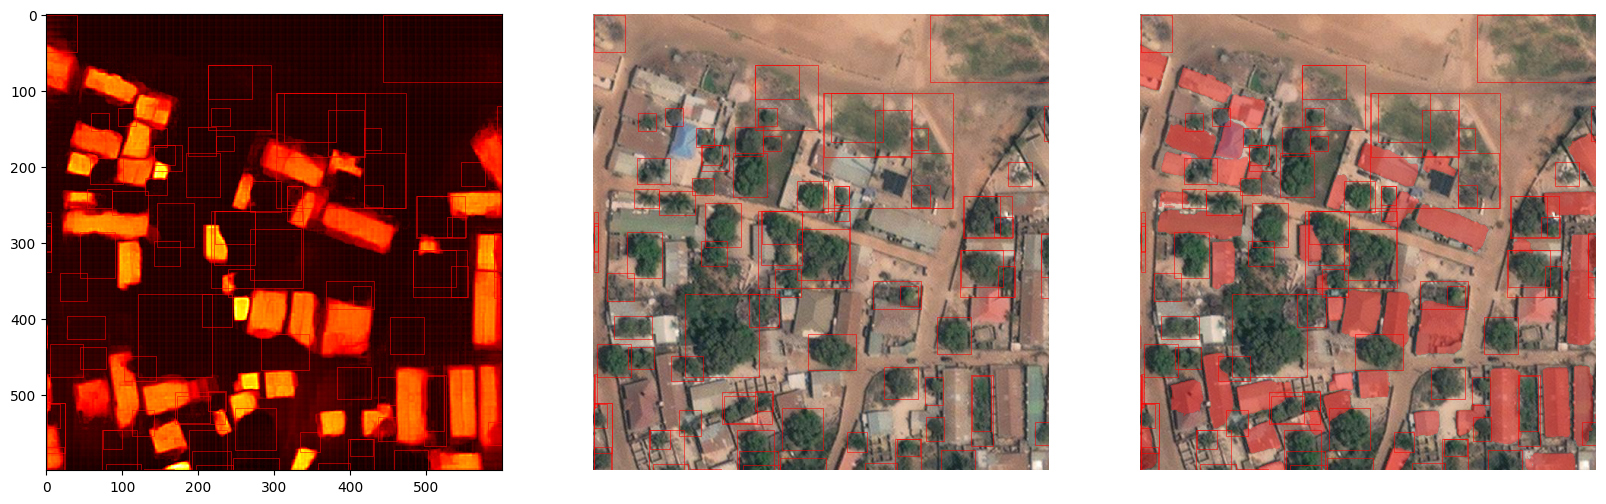

In [7]:
config.ext_mt_build_box = 0
torch.manual_seed(23)
mask = m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17])


Buildings: found 3 links matching: [33303200, 3330320, 333032]


  0%|          | 0/1 [00:02<?, ?it/s]


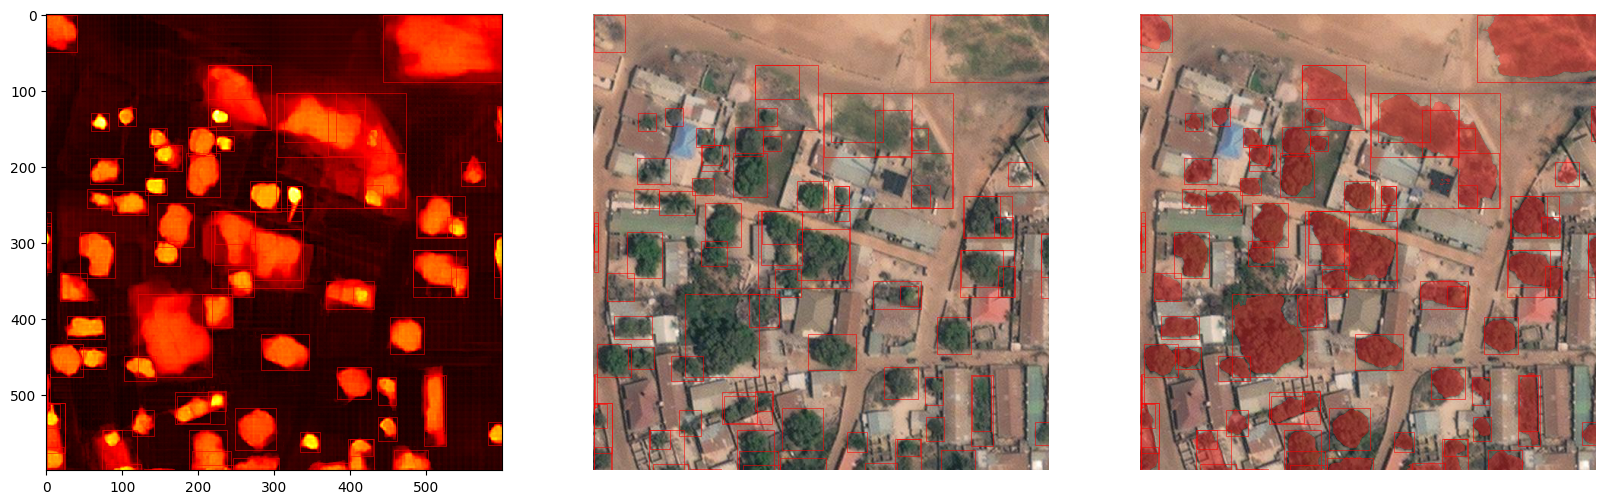

In [7]:
config.ext_mt_build_box = 0
torch.manual_seed(23)
mask = m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17])

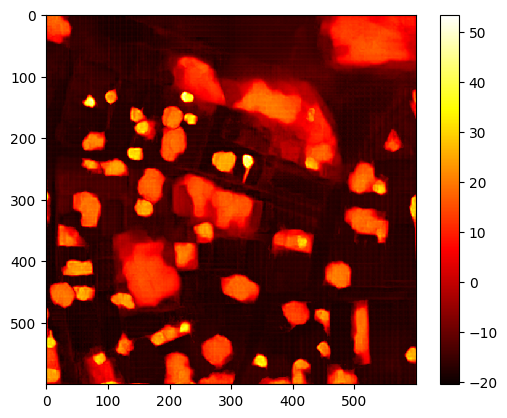

In [22]:
plt.imshow(mask, cmap='hot', interpolation='nearest')
plt.colorbar()

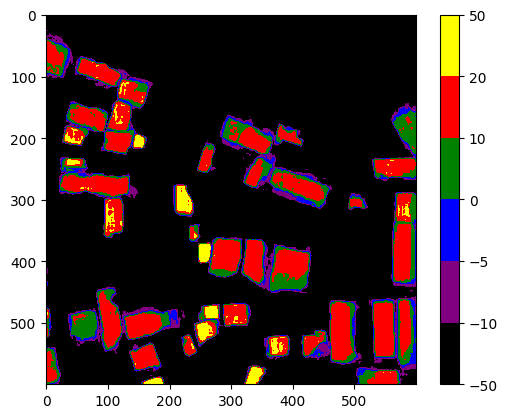

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a custom colormap
cmap = colors.ListedColormap(['black', 'purple', 'blue', 'green', 'red', 'yellow'])
bounds = [-50, -10, -5, 0, 10, 20, 50]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Visualize the matrix
plt.imshow(mask, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

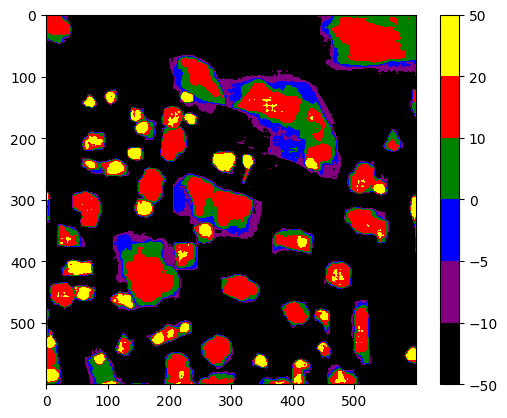

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a custom colormap
cmap = colors.ListedColormap(['black', 'purple', 'blue', 'green', 'red', 'yellow'])
bounds = [-50, -10, -5, 0, 10, 20, 50]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Visualize the matrix
plt.imshow(mask, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [14]:
mask.shape

(600, 600)

In [15]:
row_mask = np.reshape(mask, -1)
row_mask.shape

(360000,)

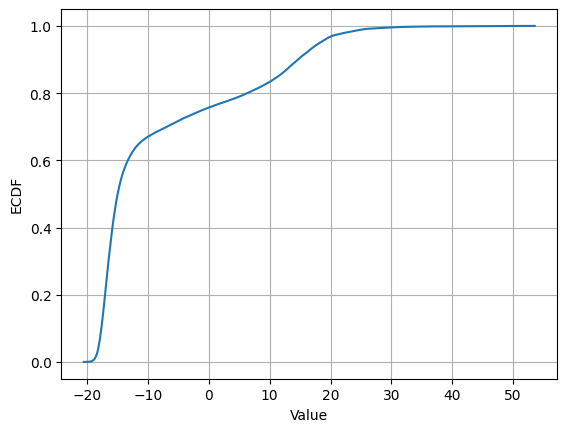

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the ECDF
data_sorted = np.sort(row_mask)
p = 1. * np.arange(len(row_mask)) / (len(row_mask) - 1)

# Plot the ECDF
plt.plot(data_sorted, p)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


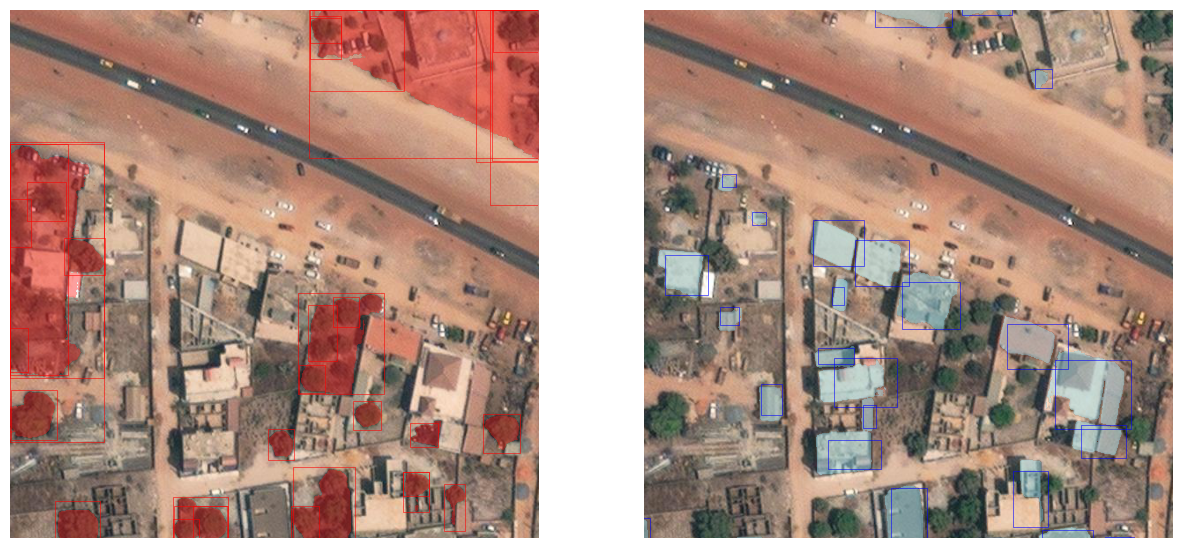

In [ ]:
#config
config.ext_mt_build_box = 0
torch.manual_seed(seed)
m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17])

In [ ]:
class light_config():
    def __init__(self, size , text_prompt, box_thre, text_thre, max_area_trees, ext_mt_build):
        self.size = size
        self.ext_mt_build_box = 0
        self.text_prompt = text_prompt
        self.box_thre = box_thre

In [7]:
size = np.arange(300, 701, 100)
TEXT_PROMPT = 'green tree'
TEXT_THRESHOLD = np.arange(0.1, 0.91, 0.2)
max_area_GD_boxes_mt2 = np.arange(4000, 8001, 1000)
min_ratio_GD_boxes_edges = np.arange(0.0, 0.9, 0.1)
ext_mt_build_box = np.arange(-5, 11, 5)

In [11]:
config.max_area_GD_boxes_mt2

6000

In [33]:
config.TEXT_THRESHOLD

0.3

In [7]:
print(config)

self.TEXT_PROMPT ='green tree'
self.BOX_THRESHOLD =0.15
self.TEXT_THRESHOLD =0.3
self.max_area_GD_boxes_mt2 =6000
self.min_ratio_GD_boxes_edges =0
self.perc_reduce_tree_boxes =0
self.road_width_mt =5
self.ext_mt_build_box =10


In [8]:
seed_dict = {"large region": 34,
             "long vertical": 39,
             "sparse trees": 45,
             "tricky square": 49,
             "new": 100}

Finetune perc reduce trees boxes

In [ ]:
perc_reduce_tree_boxes_np = np.arange(0.1, 0.31, 0.1)
txt_thre = 0.3
box_thre = 0.12
print(perc_reduce_tree_boxes_np)
for perc_reduce_tree_boxes in perc_reduce_tree_boxes_np:
    torch.manual_seed(seed_dict["new"])
    config.perc_reduce_tree_boxes = perc_reduce_tree_boxes
    config.TEXT_THRESHOLD = txt_thre
    config.BOX_THRESHOLD = box_thre
    config.min_ratio_GD_boxes_edges = 0.5
    config.max_area_GD_boxes_mt2 = 6_000
        
    m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17], title = f'Reduce perc: {perc_reduce_tree_boxes}')

In [ ]:
perc_reduce_tree_boxes_np = np.arange(0.1, 0.31, 0.1)
txt_thre = 0.3
box_thre = 0.2
print(perc_reduce_tree_boxes_np)
for perc_reduce_tree_boxes in perc_reduce_tree_boxes_np:
    torch.manual_seed(seed_dict["new"])
    config.perc_reduce_tree_boxes = perc_reduce_tree_boxes
    config.TEXT_THRESHOLD = txt_thre
    config.BOX_THRESHOLD = box_thre
    config.min_ratio_GD_boxes_edges = 0.7
    config.max_area_GD_boxes_mt2 = 6_000
        
    m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17], title = f'Reduce perc: {perc_reduce_tree_boxes}')

Finetune box and txt threshold

In [ ]:
BOX_THRESHOLD = np.arange(0.05, 0.21, 0.05)
txt_thre = 0.3
print(BOX_THRESHOLD)
for box_thre in BOX_THRESHOLD:
    torch.manual_seed(seed_dict["new"])
    config.BOX_THRESHOLD = box_thre
    config.TEXT_THRESHOLD = txt_thre
    config.min_ratio_GD_boxes_edges = 0.7
    config.max_area_GD_boxes_mt2 = 6_000
        
    m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17], title = f'box thre: {box_thre}, txt thre: {txt_thre}')

Finetune text_prompt

In [35]:
print(config)

self.TEXT_PROMPT ='green bush'
self.BOX_THRESHOLD =0.15
self.TEXT_THRESHOLD =0.3
self.max_area_GD_boxes_mt2 =6000
self.min_ratio_GD_boxes_edges =0.5
self.perc_reduce_tree_boxes =0.2
self.road_width_mt =5
self.ext_mt_build_box =10


In [ ]:
seed_dict = {"large region": 34,
             "long vertical": 39,
             "sparse trees": 45,
             "tricky square": 49,
             "bottom left missed trees": 107,
             "top left wrong square": 109,
             "new": 132124}

for param in ['green tree', 'bush', 'green bush']:
    torch.manual_seed(seed_dict["new"])
    config.TEXT_PROMPT = param
    config.perc_reduce_tree_boxes = 0.2
    config.min_ratio_GD_boxes_edges = 0.5
    config.max_area_GD_boxes_mt2 = 4_000
    m0.seg_tree_and_build_rnd_samples(m0.tiles_paths[17], title = f'text prompt: {param}')

In [5]:
from pathlib import Path
import os
if Path.cwd().name != 'src':
    os.chdir('/home/vaschetti/maxarSrc/src')
from my_functions.assemble import names